In [1]:
%pip install -q tranqu python-json-logger
# %pip install -q git+https://github.com/softwareQinc/staq
# %pip install ouqu-tp

Note: you may need to restart the kernel to use updated packages.


## Logging set up

In [2]:
import sys
import logging
from pythonjsonlogger import jsonlogger

class QubexFilter(logging.Filter):
    def filter(self, record):
        return record.name.startswith("qubex")

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.DEBUG)

log_format = '%(asctime)s %(name)s %(levelname)s %(message)s'
formatter = jsonlogger.JsonFormatter(log_format)
handler.setFormatter(formatter)

handler.addFilter(QubexFilter())
logger.addHandler(handler)

## Generate device information from system note

In [3]:
from qubex_server.tool.device_info_generator import DeviceInfoGenerator
import json
system_note = {
    "rabi_params": {
        "Q05": {
            "target": "Q05",
            "amplitude": 0.0006267143810375026,
            "frequency": 0.012533394221336326,
            "phase": 0.007392521708288216,
            "offset": 2.0594617070198232e-05,
            "noise": 1.8267412087880075e-05,
            "angle": 1.1571397642281394
        },
        "Q07": {
            "target": "Q07",
            "amplitude": 0.0004644605389426793,
            "frequency": 0.012394733955482299,
            "phase": 4.747606963866145e-16,
            "offset": 0.00011189875418757852,
            "noise": 1.822155354602728e-05,
            "angle": 0.08460576931503816
        }
    },
    "hpi_amplitude": {
        "Q05": 0.03222735419307999,
        "Q07": 0.031300036602379115
    },
    "pi_amplitude": {
        "Q05": 0.06459660148598322,
        "Q07": 0.06261284021277519
    },
    "drag_hpi_amplitude": {
        "Q05": 0.0633532419144596,
        "Q07": 0.0615374495783637
    },
    "drag_hpi_beta": {
        "Q05": 0.015885015780541144,
        "Q07": 0.016355123259324242
    },
    "readout": {
        "Q05": {
            "prob_meas1_prep0": 0.027100000000000013,
            "prob_meas0_prep1": 0.07330000000000003,
            "readout_assignment_error": 0.05020000000000002
        },
        "Q07": {
            "prob_meas1_prep0": 0.07750000000000001,
            "prob_meas0_prep1": 0.14349999999999996,
            "readout_assignment_error": 0.11049999999999999
        }
    },
    "drag_pi_amplitude": {
        "Q05": 0.1267184127106755,
        "Q07": 0.12318916752236997
    },
    "t1": {
        "Q05": 33651.29377784319,
        "Q07": 37710.45190339458
    },
    "t2": {
        "Q05": 13564.51441820196,
        "Q07": 14987.160579164993
    },
    "drag_pi_beta": {
        "Q05": 0.05854952782022226,
        "Q07": 0.05192075101352983
    },
    "average_gate_fidelity": {
        "Q05": 0.9918851304622052,
        "Q07": 0.9846660644648102
    },
    "state_centers": {
        "Q05": {
            "0": [
                -0.00014560583251768759,
                0.001344162972404538
            ],
            "1": [
                0.0011018202308197998,
                0.0008177941447132453
            ]
        },
        "Q07": {
            "0": [
                0.0017068183408319047,
                0.0007931736961419366
            ],
            "1": [
                0.0018006838672870744,
                -0.00024733272600080956
            ]
        }
    },
    "cr_params": {
        "Q05-Q07": {
            "cr_pulse": {
                "amplitude": 0.5808321524748724,
                "phase": 1.7314353175117436
            },
            "cancel_pulse": {
                "amplitude": 0.0016369405419985731,
                "phase": -1.9782518172454107
            },
            "cr_cancel_ratio": 0.0028182677818776388,
            "duration": 100,
            "ramptime": 40,
            "average_gate_fidelity": 0.9928444637756858
        }
    }
}

generator = DeviceInfoGenerator(
	device_id="1",
	basis_gates_1q=["rz", "sx", "x"],
	basis_gates_2q=["cx", "rzx90"],
	qubit_index_list=[5,7],
	system_note=system_note
)
generator.generate_device_topology()
oqtopus_device = generator.dump_topology_dict()
print(json.dumps(oqtopus_device, indent=2))



{"asctime": "2025-02-10 12:48:32,684", "name": "qubex_server.tool.device_info_generator", "levelname": "INFO", "message": "Physical node 0 not available in the real machine."}
{"asctime": "2025-02-10 12:48:32,685", "name": "qubex_server.tool.device_info_generator", "levelname": "INFO", "message": "Physical node 2 not available in the real machine."}
{"asctime": "2025-02-10 12:48:32,685", "name": "qubex_server.tool.device_info_generator", "levelname": "INFO", "message": "Physical node 1 not available in the real machine."}
{"asctime": "2025-02-10 12:48:32,686", "name": "qubex_server.tool.device_info_generator", "levelname": "INFO", "message": "Physical node 3 not available in the real machine."}
{"asctime": "2025-02-10 12:48:32,686", "name": "qubex_server.tool.device_info_generator", "levelname": "INFO", "message": "Physical node 4 not available in the real machine."}
{"asctime": "2025-02-10 12:48:32,687", "name": "qubex_server.tool.device_info_generator", "levelname": "INFO", "message"

In [4]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

## Transpile with Tranqu

In [5]:
from tranqu import Tranqu
options = {
    "basis_gates": [ "sx", "x", "rz", "cx"]
}

tranqu = Tranqu()
result = tranqu.transpile(
    program=qc,
    transpiler_lib="qiskit",
    program_lib="qiskit",
    transpiler_options=options,
    device=oqtopus_device,
    device_lib="oqtopus",
)
transpiled_program = result.transpiled_program
print(transpiled_program)

global phase: π/4
         ┌─────────┐┌────┐┌─────────┐     
q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──
         └─────────┘└────┘└─────────┘┌─┴─┐
q_1 -> 1 ────────────────────────────┤ X ├
                                     └───┘


In [6]:
from qiskit.qasm3 import dumps
qasm3 = dumps(transpiled_program)
print(qasm3)

OPENQASM 3.0;
include "stdgates.inc";
rz(pi/2) $0;
sx $0;
rz(pi/2) $0;
cx $0, $1;



In [7]:
def virtual_physical_map(device_topology_json: dict):
	device_topology = device_topology_json
	qubits = {
		qubit["id"]: qubit["physical_id"] for qubit in device_topology["qubits"]
	}
	couplings = {
		(c["control"], c["target"]): (qubits[c["control"]], qubits[c["target"]])
		for c in device_topology["couplings"]
	}
	return {"qubits": qubits, "couplings": couplings}

## Create virtual-physical mapping from calibration data

In [8]:
_virtual_physical_map = virtual_physical_map(oqtopus_device)
print(_virtual_physical_map)

{'qubits': {0: 5, 1: 7}, 'couplings': {(0, 1): (5, 7)}}


## Define Qulacs Backend and Load OpenQASM3

In [9]:
from qubex_server.backend.qulacs import QulacsBackend
backend = QulacsBackend(virtual_physical_map=_virtual_physical_map)
backend.load_program(qasm3)


{"asctime": "2025-02-10 12:49:10,994", "name": "qubex_server.backend.base", "levelname": "INFO", "message": "Loading QASM 3 program: OPENQASM 3.0;\ninclude \"stdgates.inc\";\nrz(pi/2) $0;\nsx $0;\nrz(pi/2) $0;\ncx $0, $1;\n, job_id=test_job"}


In [10]:
backend.compile()

{"asctime": "2025-02-10 12:49:12,562", "name": "qubex_server.backend.qulacs", "levelname": "INFO", "message": "QASM 3 program: OPENQASM 3.0;\ninclude \"stdgates.inc\";\nrz(pi/2) $0;\nsx $0;\nrz(pi/2) $0;\ncx $0, $1;\n, job_id=test_job"}
{"asctime": "2025-02-10 12:49:12,679", "name": "qubex_server.backend.base", "levelname": "DEBUG", "message": "Applying RZ gate: 0, Physical qubit: 5, angle=1.5707963267948966, job_id=test_job"}
{"asctime": "2025-02-10 12:49:12,680", "name": "qubex_server.backend.base", "levelname": "DEBUG", "message": "Applying X90 gate: 0, Physical qubit: 5, job_id=test_job"}
{"asctime": "2025-02-10 12:49:12,680", "name": "qubex_server.backend.base", "levelname": "DEBUG", "message": "Applying RZ gate: 0, Physical qubit: 5, angle=1.5707963267948966, job_id=test_job"}
{"asctime": "2025-02-10 12:49:12,680", "name": "qubex_server.backend.base", "levelname": "DEBUG", "message": "Applying CNOT gate: 0 -> 1, Physical qubits: 5 -> 7, job_id=test_job"}
{"asctime": "2025-02-10 1

In [11]:
result = backend.execute()
print(backend.result)

{"asctime": "2025-02-10 12:49:14,831", "name": "qubex_server.backend.qulacs", "levelname": "INFO", "message": "Executing quantum circuit with 1024 shots"}
{"asctime": "2025-02-10 12:49:14,832", "name": "qubex_server.backend.qulacs", "levelname": "INFO", "message": "Execution complete, counts: {'11': 539, '00': 485}, job_id=test_job"}
{'11': 539, '00': 485}


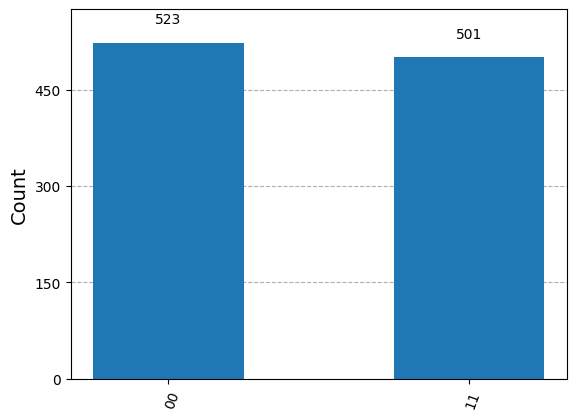

In [25]:
backend.plot_histogram()